In [38]:
#Google Colab File -ashutoshtiwari13

import gym
import numpy as np
import random 
import math
from collections import defaultdict,deque
import matplotlib.pyplot as plt
%matplotlib inline

from utils import plot_values

env =gym.make('CliffWalking-v0')

In [39]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


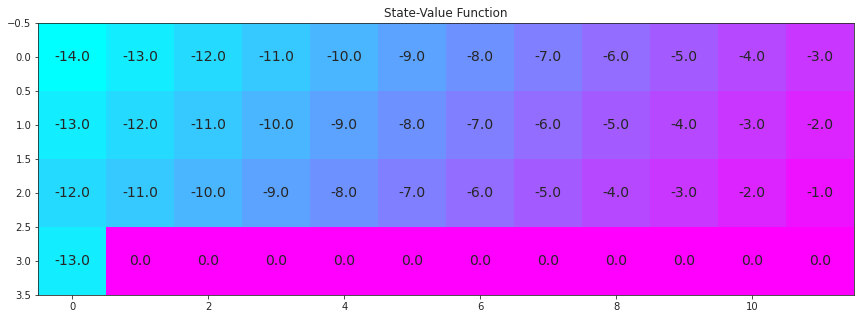

In [40]:
#Optimal state-value fucntion 
V_opt = np.zeros((4,12))
V_opt[0][0:13]= -np.arange(3,15)[::-1]
V_opt[1][0:13]= -np.arange(3,15)[::-1]+1
V_opt[2][0:13]= -np.arange(3,15)[::-1]+2
V_opt[3][0] = -13

plot_values(V_opt)

In [60]:
#Expected Sarsa Temporal Difference control
def expsarsa_update(alpha , gamma ,nA, eps, Q, state , action,reward, next_state =None):
  current = Q[state][action]
  """Expected value of the next state-action pair where the expectation takes into account 
  the probablity that the agent selects each possible action from the next state """

  policy = np.ones(nA) * eps/nA
  best_action = np.argmax(Q[next_state])
  policy[best_action] = 1 - eps + (eps / nA)     #assigning the next bulk of the probablity to non-greedy step
  Qsa_next = np.dot(Q[next_state], policy)
  
  target = reward + (gamma * Qsa_next)                    
  new_value = current  + (alpha *(target - current))
  return new_value

def epsilon_greedy(Q, state, nA, episode):
  if random.random() > episode:
    return np.argmax(Q[state])
  else:
    return random.choice(np.arange(nA))

In [62]:
def generate_episode(Q, nA , eps, alpha, plot_every=100,gamma=1.0):
  score =0
  scores = deque(maxlen = plot_every)
  state = env.reset()
  while True:
    action = epsilon_greedy(Q, state, nA, eps)
    next_state, reward, done , info = env.step(action)
    score +=reward

    Q[state][action] = expsarsa_update(alpha, gamma , nA, eps, Q, state, action , reward , next_state)
    state = next_state
    if done:
      scores.append(score)
      break
  return scores    



In [63]:
def expected_sarsa_td_control(env, num_episodes, alpha, gamma=1.0, plot_every=100):
  
  nA= env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  avg_scores = deque(maxlen = num_episodes)

  for episode in range(1, num_episodes+1):
    if episode % 100 ==0:
      print("\r Epsiode :{}/{}.".format(episode,num_episodes),end="")
    eps = 0.005

    estimated_scores = generate_episode(Q, nA , eps, alpha)
    if (episode % plot_every ==0):
      avg_scores.append(np.mean(estimated_scores))

  plt.plot(np.linspace(0, num_episodes, len(avg_scores), endpoint=False), np.array(avg_scores))
  plt.xlabel("Episode Number")
  plt.ylabel("Average reward Over %d rewards" % plot_every)
  plt.show()

  print(("Best Average reward over %d Epsiode: " % plot_every), np.max(avg_scores))
  return Q 

 Epsiode :10000/10000.

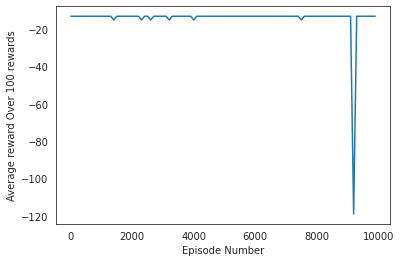

Best Average reward over 100 Epsiode:  -13.0


In [65]:
Q_expectedsarsa = expected_sarsa_td_control(env,10000,1)

defaultdict(<function expected_sarsa_td_control.<locals>.<lambda> at 0x7f63ea5b5510>, {36: array([ -14.3990126 , -114.52699249,  -15.52699249,  -15.52699249]), 24: array([-14.03588527, -13.39428886, -15.52699249, -14.39898404]), 12: array([-13.03708492, -13.03567308, -13.19706084, -13.04262353]), 0: array([-13.00690802, -13.01309196, -13.00568665, -13.03708492]), 1: array([-12.01767918, -12.01562798, -13.02699464, -13.01756368]), 2: array([-12.01182315, -11.01425006, -11.38424596, -13.0165298 ]), 3: array([-10.01594359, -10.15629821, -10.01656311, -11.02056257]), 4: array([-10.01298241, -10.0046615 , -10.02043998, -10.40204402]), 5: array([-9.01261454, -9.00464481, -9.01260284, -9.00590874]), 6: array([-8.00516721, -8.0043162 , -8.00446837, -8.27458792]), 7: array([-7.00479548, -7.00430872, -7.00836032, -8.39520035]), 8: array([-6.00430947, -6.00628503, -6.0075696 , -8.006036  ]), 9: array([-6.00255984, -5.00378691, -5.00458105, -6.00271872]), 10: array([-5.00129334, -4.00252697, -4.00

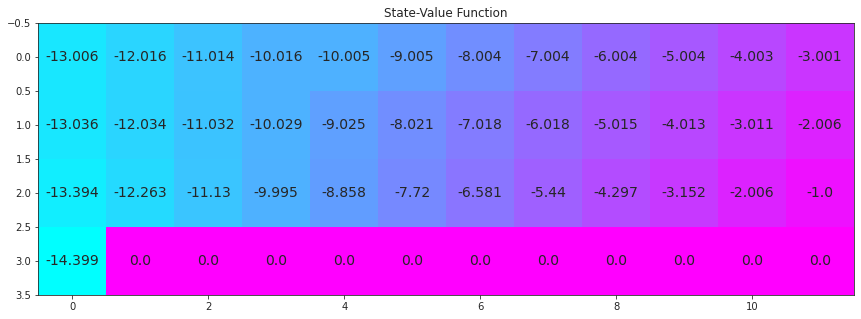

In [66]:
# Estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expectedsarsa[key]) if key in Q_expectedsarsa else -1 for key in np.arange(48)]).reshape(4,12)
print(Q_expectedsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expectedsarsa[key]) if key in Q_expectedsarsa else 0 for key in np.arange(48)])